## Deep Learning with Tensorflow 2.0 Tutorial - Getting Started with Tensorflow 2.0 and Keras for Beginners

### What is Tensorflow?

Tensorflow architecture works in three parts:

- Preprocessing the data
- Build the model
- Train and estimate the model

I am assuming that you know a little about the machine learning and deep learning

### Why Every Data Scientist Learn Tensorflow 2.x not Tensorflow 1.x

- API Cleanup
- Eager execution
- No more globals
- Functions, not sessions (session.run())
- Use Keras layers and models to manage variables
- It is faster
- It takes less space
- More consistent
- and many more, watch Google I/O https://www.youtube.com/watch?v=lEljKc9ZtU8
- Github Link: https://github.com/tensorflow/tensorflow/releases

 ##### !pip install tensorflow==2.0.0-rc0 
 ##### !pip install tensorflow-gpu==2.0.0-rc0

## Import the Fashion MNIST dataset

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0-rc1


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
mnist = keras.datasets.fashion_mnist

In [7]:
type(mnist)

module

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [10]:
np.max(X_train)

255

In [11]:
np.mean(X_train)

72.94035223214286

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data Exploration

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

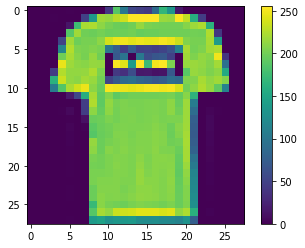

In [16]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [17]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
X_train = X_train/255.0

In [19]:
X_test = X_test/255.0

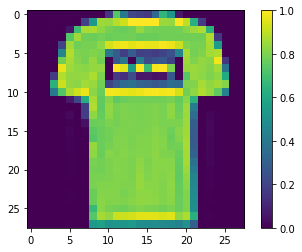

In [20]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0 

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [22]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
- Loss Function
- Optimizer
- Metrics

In [24]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 147us/sample - loss: 0.4958 - accuracy: 0.8234 - val_loss: 0.4398 - val_accuracy: 0.8406
Epoch 2/10
48000/48000 [==============================] - 7s 141us/sample - loss: 0.3750 - accuracy: 0.8619 - val_loss: 0.4044 - val_accuracy: 0.8502
Epoch 3/10
48000/48000 [==============================] - 7s 140us/sample - loss: 0.3378 - accuracy: 0.8758 - val_loss: 0.3597 - val_accuracy: 0.8745
Epoch 4/10
48000/48000 [==============================] - 7s 140us/sample - loss: 0.3144 - accuracy: 0.8846 - val_loss: 0.3404 - val_accuracy: 0.8748
Epoch 5/10
48000/48000 [==============================] - 7s 141us/sample - loss: 0.2959 - accuracy: 0.8911 - val_loss: 0.3289 - val_accuracy: 0.8775
Epoch 6/10
48000/48000 [==============================] - 7s 141us/sample - loss: 0.2803 - accuracy: 0.8957 - val_loss: 0.3289 - val_accuracy: 0.8806
Epoch 7/10
48000/48000 [==========================

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_pred = model.predict_classes(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.8757

In [30]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [31]:
pred = model.predict(X_test)

In [32]:
pred

array([[5.4513075e-11, 3.6265406e-16, 2.9186133e-12, ..., 1.7391348e-03,
        5.9284604e-09, 9.9820030e-01],
       [1.2286601e-04, 3.5465114e-14, 9.9874324e-01, ..., 3.4541975e-24,
        1.2511295e-10, 7.9903406e-22],
       [4.6733353e-13, 1.0000000e+00, 1.0582410e-19, ..., 0.0000000e+00,
        3.5603037e-19, 4.6489725e-33],
       ...,
       [8.8692730e-05, 2.6603335e-12, 1.1767040e-05, ..., 4.1183171e-11,
        9.9953008e-01, 2.3586357e-14],
       [4.8976930e-11, 1.0000000e+00, 1.6037986e-13, ..., 4.6921684e-22,
        4.6663125e-11, 3.4693788e-17],
       [1.5355863e-05, 6.7319766e-13, 7.2787437e-08, ..., 2.0974281e-03,
        6.5228948e-04, 1.3419141e-05]], dtype=float32)

In [33]:
pred[0]

array([5.4513075e-11, 3.6265406e-16, 2.9186133e-12, 9.1055784e-17,
       3.5831997e-14, 6.0483479e-05, 2.5905648e-13, 1.7391348e-03,
       5.9284604e-09, 9.9820030e-01], dtype=float32)

In [34]:
np.argmax(pred[0])

9

In [35]:
np.argmax(pred[1])

2

## Plotting Learning Curve and Confusion Matrix in TensorFlow 2.0

##### Watch this video: https://youtu.be/SToqP9V9y7Q 

pip install mlxtend  ->  http://rasbt.github.io/mlxtend/installation/

In [36]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.co

In [37]:
history.history

{'loss': [0.4958166305484095,
  0.37495892869182473,
  0.33782970148924507,
  0.3143977878571119,
  0.2958678436005721,
  0.2803116410095148,
  0.26910608981667183,
  0.2590789385385385,
  0.25000071137769436,
  0.24185068468711998],
 'accuracy': [0.8233542,
  0.8618542,
  0.87575,
  0.8845625,
  0.89110416,
  0.89566666,
  0.90035415,
  0.902875,
  0.9073125,
  0.90995836],
 'val_loss': [0.43983182716493807,
  0.4044468723990334,
  0.3596765346227524,
  0.3404190042654712,
  0.32894165122144237,
  0.3289287478025653,
  0.351720313768213,
  0.32318402707157173,
  0.3423364769398419,
  0.34065028570169187],
 'val_accuracy': [0.8405833,
  0.8501667,
  0.8745,
  0.87475,
  0.8775,
  0.88058335,
  0.875,
  0.88491666,
  0.8835833,
  0.88491666]}

In [38]:
import matplotlib.pyplot as plt

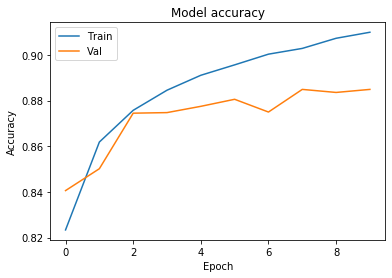

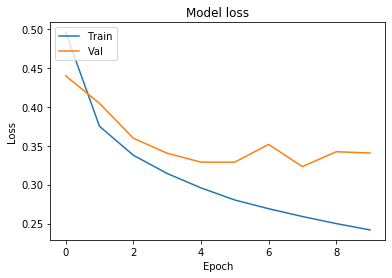

In [39]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Plot Confusion matrix 

In [40]:
!pip install mlxtend

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [41]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x169a8403780>)

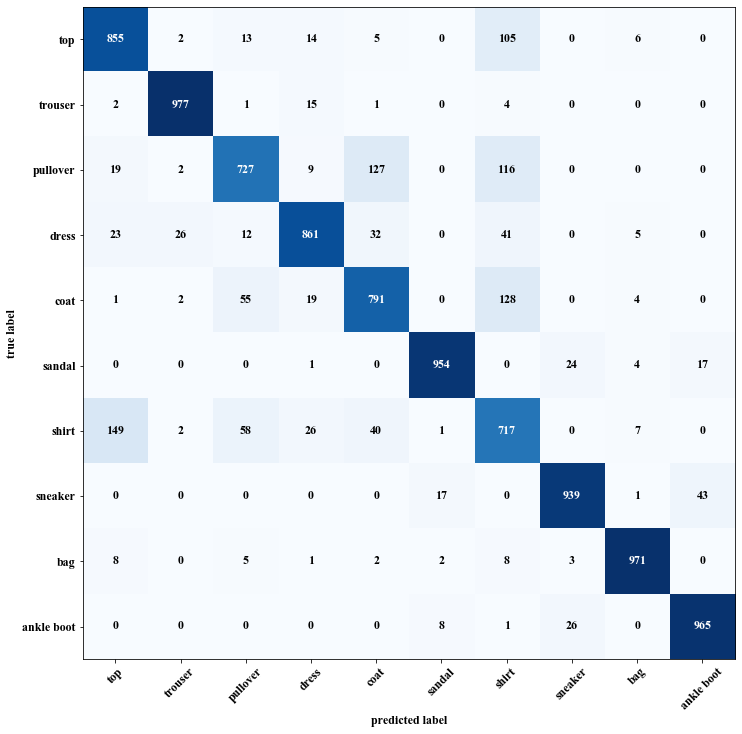

In [42]:
font = {
    'family': 'Times New Roman',
    'size': 12
}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(12, 12), class_names = class_names, show_normed=False)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x169a8515da0>)

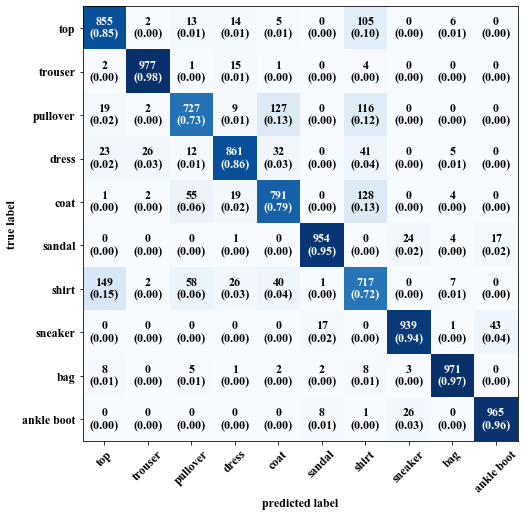

In [43]:
# font = {
#     'family': 'Times New Roman',
#     'size': 16
# }
# matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8), class_names = class_names, show_normed=True)